In [1]:
!pip3 install mlxtend

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd

import mlxtend 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#import splitfolders
import os
import cv2
import numpy as np
import random

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/DR/Dataset1', output="splitted_data", seed=1337, ratio=(.8, 0.1,0.1)) 

In [ ]:
!zip -r '/content/splitted_data.zip' '/content/splitted_data'

!cp '/content/splitted_data.zip' -d '/content/drive/MyDrive/DR'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = get_data('/content/drive/MyDrive/Colab Notebooks/CSE499New/train_test_val/train')
val = get_data('/content/drive/MyDrive/Colab Notebooks/CSE499New/train_test_val/val')
test = get_data('/content/drive/MyDrive/Colab Notebooks/CSE499New/train_test_val/test')

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255


x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
x_train.shape

(5119, 128, 128, 3)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,
        fill_mode='nearest',  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
def get_model():

  model = Sequential()
  model.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(128,128,3)))
  model.add(MaxPool2D())

  model.add(Conv2D(64, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))

  #model.add(Conv2D(64, 3, padding="same", activation="relu"))
  #model.add(BatchNormalization())
  #model.add(MaxPool2D())

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D())

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))


  model.add(Flatten())
  model.add(Dense(128,activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(4, activation="softmax"))

  return model

model=get_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       7

In [ ]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 200,batch_size=64 , validation_data = (x_val, y_val))

Epoch 1/200
80/80 [==============================] - 20s 116ms/step - loss: 1.0712 - accuracy: 0.4909 - val_loss: 1.3169 - val_accuracy: 0.5008
Epoch 2/200
80/80 [==============================] - 8s 96ms/step - loss: 0.9861 - accuracy: 0.5196 - val_loss: 1.3110 - val_accuracy: 0.5352
Epoch 3/200
80/80 [==============================] - 8s 95ms/step - loss: 0.9263 - accuracy: 0.5534 - val_loss: 1.2851 - val_accuracy: 0.5243
Epoch 4/200
80/80 [==============================] - 8s 96ms/step - loss: 0.8955 - accuracy: 0.5700 - val_loss: 1.2293 - val_accuracy: 0.5321
Epoch 5/200
80/80 [==============================] - 8s 96ms/step - loss: 0.8608 - accuracy: 0.5966 - val_loss: 1.1289 - val_accuracy: 0.5837
Epoch 6/200
80/80 [==============================] - 8s 95ms/step - loss: 0.8339 - accuracy: 0.6079 - val_loss: 1.0414 - val_accuracy: 0.6135
Epoch 7/200
80/80 [==============================] - 8s 95ms/step - loss: 0.8083 - accuracy: 0.6296 - val_loss: 0.9894 - val_accuracy: 0.5462
Epoc

In [ ]:
scores = model.evaluate(x_val,y_val , verbose=0)

In [ ]:
accuracy= scores[1]*100
loss=scores[0]
print('Accuracy: ', accuracy)
print('Loss: ',  loss)

Accuracy:  99.37402009963989
Loss:  0.013206219300627708


In [ ]:
model.save('model.h5')

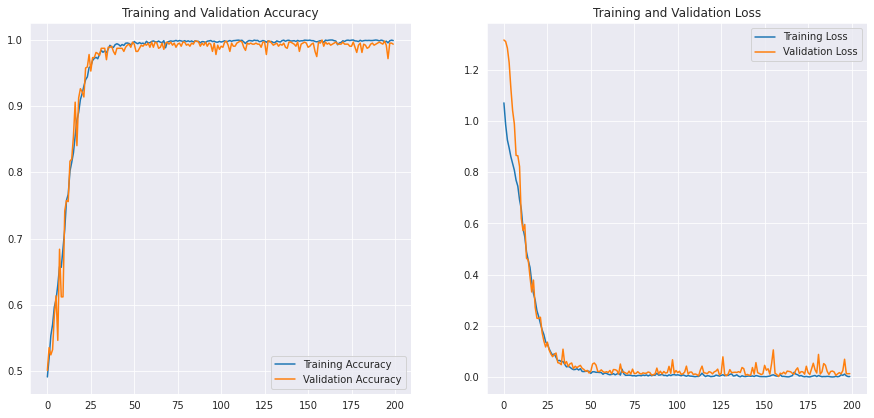

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

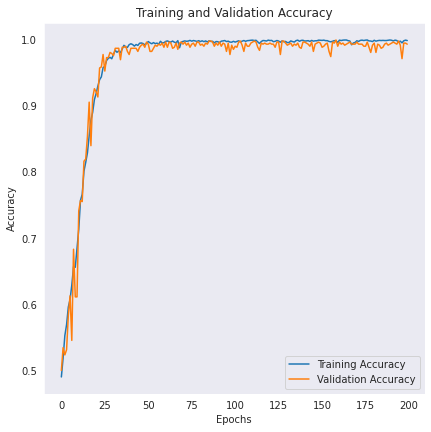

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(False)
plt.title('Training and Validation Accuracy')

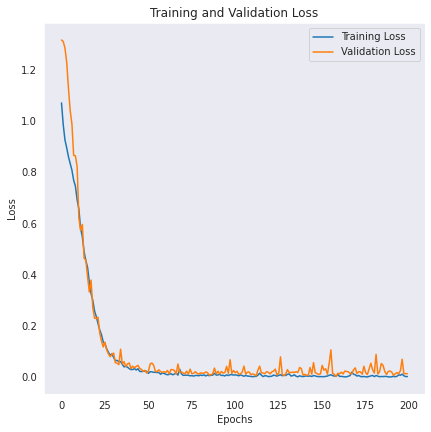

In [ ]:
epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(False)
plt.show()

In [ ]:
model=tf.keras.models.load_model('model.h5')

In [ ]:
prediction=model.predict([x_val])

In [ ]:
print(np.argmax(prediction[4]))

0


In [ ]:
test_data_dir= '/content/drive/MyDrive/Colab Notebooks/CSE499New/train_test_val/test'
test_generator = ImageDataGenerator().flow_from_directory(test_data_dir
                                                           , target_size=(128, 128)
                                                           , batch_size=5
                                                           , classes=labels
                                                           , seed=0
                                                           , shuffle=False)

Found 642 images belonging to 4 classes.


In [ ]:
train_data_dir='/content/drive/MyDrive/Colab Notebooks/CSE499New/train_test_val/train'
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir
                                                           , target_size=(128, 128)
                                                           , batch_size=10
                                                           , classes=labels
                                                           , seed=0
                                                           , shuffle=True)

Found 5119 images belonging to 4 classes.


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_generator)

In [ ]:
predictions[39]

array([0.47536686, 0.17487772, 0.17487772, 0.17487772], dtype=float32)

In [ ]:
np.argmax(predictions[39])

0

Plot Confusion matrix

(<Figure size 576x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7c73328cd0>)

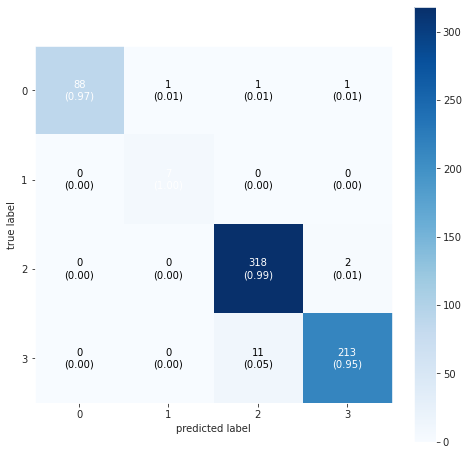

In [ ]:
actual = test_generator.classes
predict = np.argmax(model.predict(test_generator),axis =1)
cm=confusion_matrix(actual,predict)
plot_confusion_matrix(cm,figsize=(8,8),
                    colorbar=True,show_normed=True,)

In [ ]:
print(classification_report(actual,predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        91
           1       0.88      1.00      0.93         7
           2       0.96      0.99      0.98       320
           3       0.99      0.95      0.97       224

    accuracy                           0.98       642
   macro avg       0.96      0.98      0.97       642
weighted avg       0.98      0.98      0.98       642



In [ ]:
print(actual)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [ ]:
print(predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 3 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 3 3 3 3 2 3 3 3 3 